# 🧠 MNIST Digit Classification using Feedforward Neural Network (FNN)

**Author:** Yisakor Mirany  
**Framework:** TensorFlow / Keras  

This notebook demonstrates how to **build**, **train**, and **evaluate** a simple Feedforward Neural Network (FNN) to classify handwritten digits (0–9) from the MNIST dataset.

In [4]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

print("✅ TensorFlow version:", tf.__version__)

✅ TensorFlow version: 2.19.0


## 📊 Step 2: Data Loading and Preprocessing

We will:
1. Load the MNIST dataset (training + test sets)  
2. Normalize pixel values from 0–255 to 0–1  
3. Flatten each 28×28 image into a 784-element vector  
4. One-hot encode the labels (0–9)


In [5]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display the shapes of the raw data
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Flatten 28×28 images → 784 features
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test  = x_test.reshape((x_test.shape[0], 28 * 28))

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

print("\n✅ After preprocessing:")
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)

✅ After preprocessing:
x_train: (60000, 784)
y_train: (60000, 10)


## 🧠 Step 3: Model Architecture

We will build a simple Feedforward Neural Network (FNN) with:
- Input layer: 784 neurons (one per pixel)  
- Hidden layer 1: 128 neurons (ReLU activation)  
- Hidden layer 2: 64 neurons (ReLU activation)  
- Output layer: 10 neurons (Softmax activation)


In [6]:
# Define the model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Display model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## ⚙️ Step 4: Compile and Train the Model

We’ll use:
- Loss function: `categorical_crossentropy` (for multi-class classification)  
- Optimizer: `adam`  
- Metric: `accuracy`  
- Epochs: 10


In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

Epoch 1/10
422/422 - 4s - 9ms/step - accuracy: 0.8957 - loss: 0.3662 - val_accuracy: 0.9602 - val_loss: 0.1332
Epoch 2/10
422/422 - 2s - 6ms/step - accuracy: 0.9572 - loss: 0.1434 - val_accuracy: 0.9705 - val_loss: 0.0983
Epoch 3/10
422/422 - 3s - 7ms/step - accuracy: 0.9704 - loss: 0.0993 - val_accuracy: 0.9753 - val_loss: 0.0876
Epoch 4/10
422/422 - 2s - 6ms/step - accuracy: 0.9774 - loss: 0.0737 - val_accuracy: 0.9733 - val_loss: 0.0887
Epoch 5/10
422/422 - 2s - 5ms/step - accuracy: 0.9818 - loss: 0.0609 - val_accuracy: 0.9743 - val_loss: 0.0800
Epoch 6/10
422/422 - 3s - 6ms/step - accuracy: 0.9860 - loss: 0.0465 - val_accuracy: 0.9725 - val_loss: 0.0917
Epoch 7/10
422/422 - 2s - 5ms/step - accuracy: 0.9877 - loss: 0.0393 - val_accuracy: 0.9782 - val_loss: 0.0764
Epoch 8/10
422/422 - 3s - 7ms/step - accuracy: 0.9905 - loss: 0.0317 - val_accuracy: 0.9797 - val_loss: 0.0742
Epoch 9/10
422/422 - 2s - 5ms/step - accuracy: 0.9929 - loss: 0.0244 - val_accuracy: 0.9767 - val_loss: 0.0861
E

## 🧾 Step 5: Model Evaluation

We’ll evaluate the model on the test set and report the final accuracy.


In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n✅ Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9745 - loss: 0.0953

✅ Test accuracy: 0.9768


## 🔍 Step 6: Random Prediction Demo

Let’s pick a random image from the test set and see how the model predicts it.


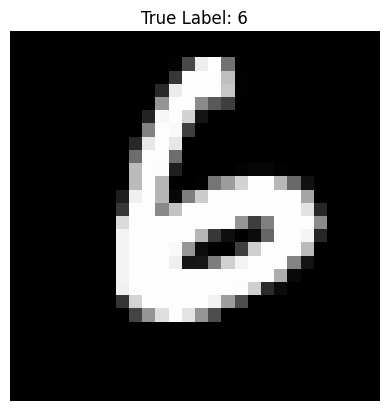

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
🔹 Predicted Label: 6
🔹 True Label: 6


In [9]:
# Pick a random test image
index = np.random.randint(0, len(x_test))
img = x_test[index]
true_label = np.argmax(y_test[index])

# Display image
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {true_label}")
plt.axis('off')
plt.show()

# Model prediction
prediction = np.argmax(model.predict(img.reshape(1, 784)))
print(f"🔹 Predicted Label: {prediction}")
print(f"🔹 True Label: {true_label}")
